# Parte I: Análisis exploratorio (6 puntos)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Obtengo el dataset

In [2]:
df_identity = pd.read_csv("dataset/train_identity.csv")
df_transaction = pd.read_csv("dataset/train_transaction.csv")

df = df_identity.merge(df_transaction, on="TransactionID", how="outer")

df_identity, df_transaction = None, None

In [3]:
len_rows , len_columns = df.shape

## Exploracion

### Observo variable categoricas

In [4]:
features_categoricos = df.dtypes[(df.dtypes =="object")].index
features_categoricos

Index(['id_12', 'id_15', 'id_16', 'id_23', 'id_27', 'id_28', 'id_29', 'id_30',
       'id_31', 'id_33', 'id_34', 'id_35', 'id_36', 'id_37', 'id_38',
       'DeviceType', 'DeviceInfo', 'ProductCD', 'card4', 'card6',
       'P_emaildomain', 'R_emaildomain', 'M1', 'M2', 'M3', 'M4', 'M5', 'M6',
       'M7', 'M8', 'M9'],
      dtype='object')

In [5]:
for f in features_categoricos:
    print("\n-------------------------------------------")
    print("~~FEATURE:"+f+"~")
    print(df[f].value_counts())


-------------------------------------------
~~FEATURE:id_12~
NotFound    123025
Found        21208
Name: id_12, dtype: int64

-------------------------------------------
~~FEATURE:id_15~
Found      67728
New        61612
Unknown    11645
Name: id_15, dtype: int64

-------------------------------------------
~~FEATURE:id_16~
Found       66324
NotFound    63016
Name: id_16, dtype: int64

-------------------------------------------
~~FEATURE:id_23~
IP_PROXY:TRANSPARENT    3489
IP_PROXY:ANONYMOUS      1071
IP_PROXY:HIDDEN          609
Name: id_23, dtype: int64

-------------------------------------------
~~FEATURE:id_27~
Found       5155
NotFound      14
Name: id_27, dtype: int64

-------------------------------------------
~~FEATURE:id_28~
Found    76232
New      64746
Name: id_28, dtype: int64

-------------------------------------------
~~FEATURE:id_29~
Found       74926
NotFound    66052
Name: id_29, dtype: int64

-------------------------------------------
~~FEATURE:id_30~
Windows 10

### Identifico prefijos en nombre de features

In [6]:
# PREFIJO: dist
dist_columns = []
for i in list(df.columns):
    if(i[:4] == "dist"):
        dist_columns.append(i)

# PREFIJO: addr
addr_columns = []
for i in list(df.columns):
    if(i[:4] == "addr"):
        addr_columns.append(i)
        
# PREFIJO: id_
id__columns = []
for i in list(df.columns):
    if(i[:3] == "id_"):
        id__columns.append(i)
        
# PREFIJO: card
card_columns = []
for i in list(df.columns):
    if(i[:4] == "card"):
        card_columns.append(i)

# PREFIJO: Device
Device_columns = []
for i in list(df.columns):
    if(i[:6] == "Device"):
        Device_columns.append(i)

# PREFIJO: Transaction
Transaction_columns = []
for i in list(df.columns):
    if(i[:5] == "Transaction"):
        Transaction_columns.append(i)
        
# PREFIJO: V
V_columns = []
for i in list(df.columns):
    if(i[0] == "V"):
        V_columns.append(i)

# PREFIJO: D
D_columns = ["D" + str(n) for n in range(1,10)]

# PREFIJO: M
M_columns = ["M" + str(n) for n in range(1,10)]

# PREFIJO: C
C_columns = ["C" + str(n) for n in range(1,15)]

# PREFIJO: P
P_columns = ["ProductCD", "P_emaildomain"]

# PREFIJO: R
R_columns = ["R_emaildomain"]

In [7]:
corr_with_target = df.corr()["isFraud"]

In [8]:
corr_largest = corr_with_target.nlargest(101)
top_100 = list(set(corr_largest.index).difference({"isFraud"}))
top_10 = top_100[:10]
top_15 = top_100[:16]
top_25 = top_100[:25]
top_50 = top_100[:50]

## Visualizaciones

### Visualizacion 1: 

In [9]:
# Obtencion de datos

top_20_cols = top_15
df_top_20 =  pd.DataFrame()
for feature in top_20_cols:
    df_new = pd.DataFrame()
    df_new["points"] = df[feature].apply(lambda x: 10.0 if(x>10.0) else x)
    df_new["isFraud"] = df["isFraud"]
    df_new["feature"] = feature
    df_top_20 = df_top_20.append(df_new)

df_top_20.head()

,points,isFraud,feature
0,NaN,0,V59
1,NaN,0,V59
2,1.0,0,V59
3,1.0,0,V59
4,NaN,0,V59


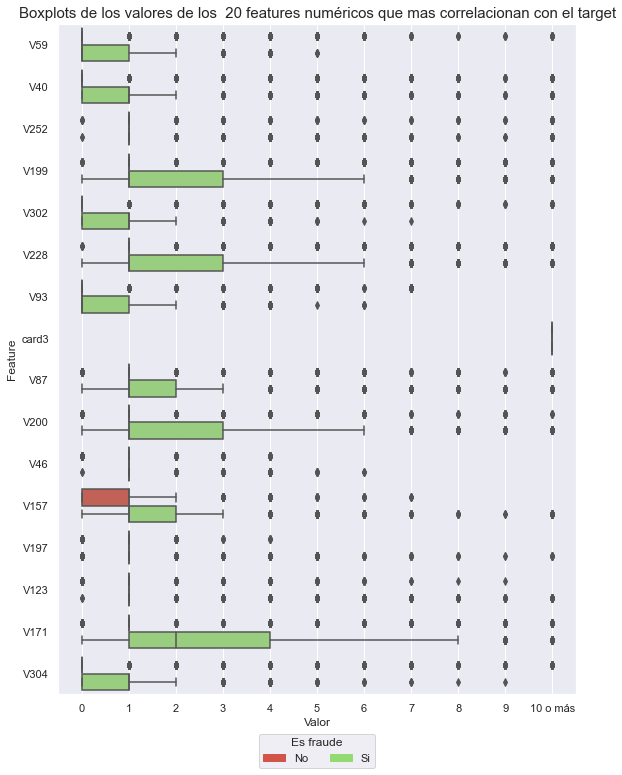

In [10]:
# Generacion de grafico 

sns.set(style="darkgrid")

fig, axs = plt.subplots(ncols=1, figsize=(8,10))
fig.tight_layout()

g1 = sns.boxplot(
    data=df_top_20,
    x="points",
    y="feature",
    hue="isFraud",
    palette=sns.color_palette(['#d25347', '#94da72'])
)

g1.set(
    ylabel="Feature",
    xlabel="Valor",
    xticks = range(0,11),
    xticklabels = ["0","1","2","3","4","5","6","7","8","9","10 o más"]
)

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='#d25347', label='NO')
red_patch = mpatches.Patch(color='#94da72', label='SI')
g1.legend(loc='upper center',  ncol=2, bbox_to_anchor=(0.5, -0.05), title="Es fraude", labels=['No', 'Si'], handles=[green_patch, red_patch])

g1.set_title("Boxplots de los valores de los  20 features numéricos que mas correlacionan con el target", fontsize=15)

plt.show()

### Visualización 2

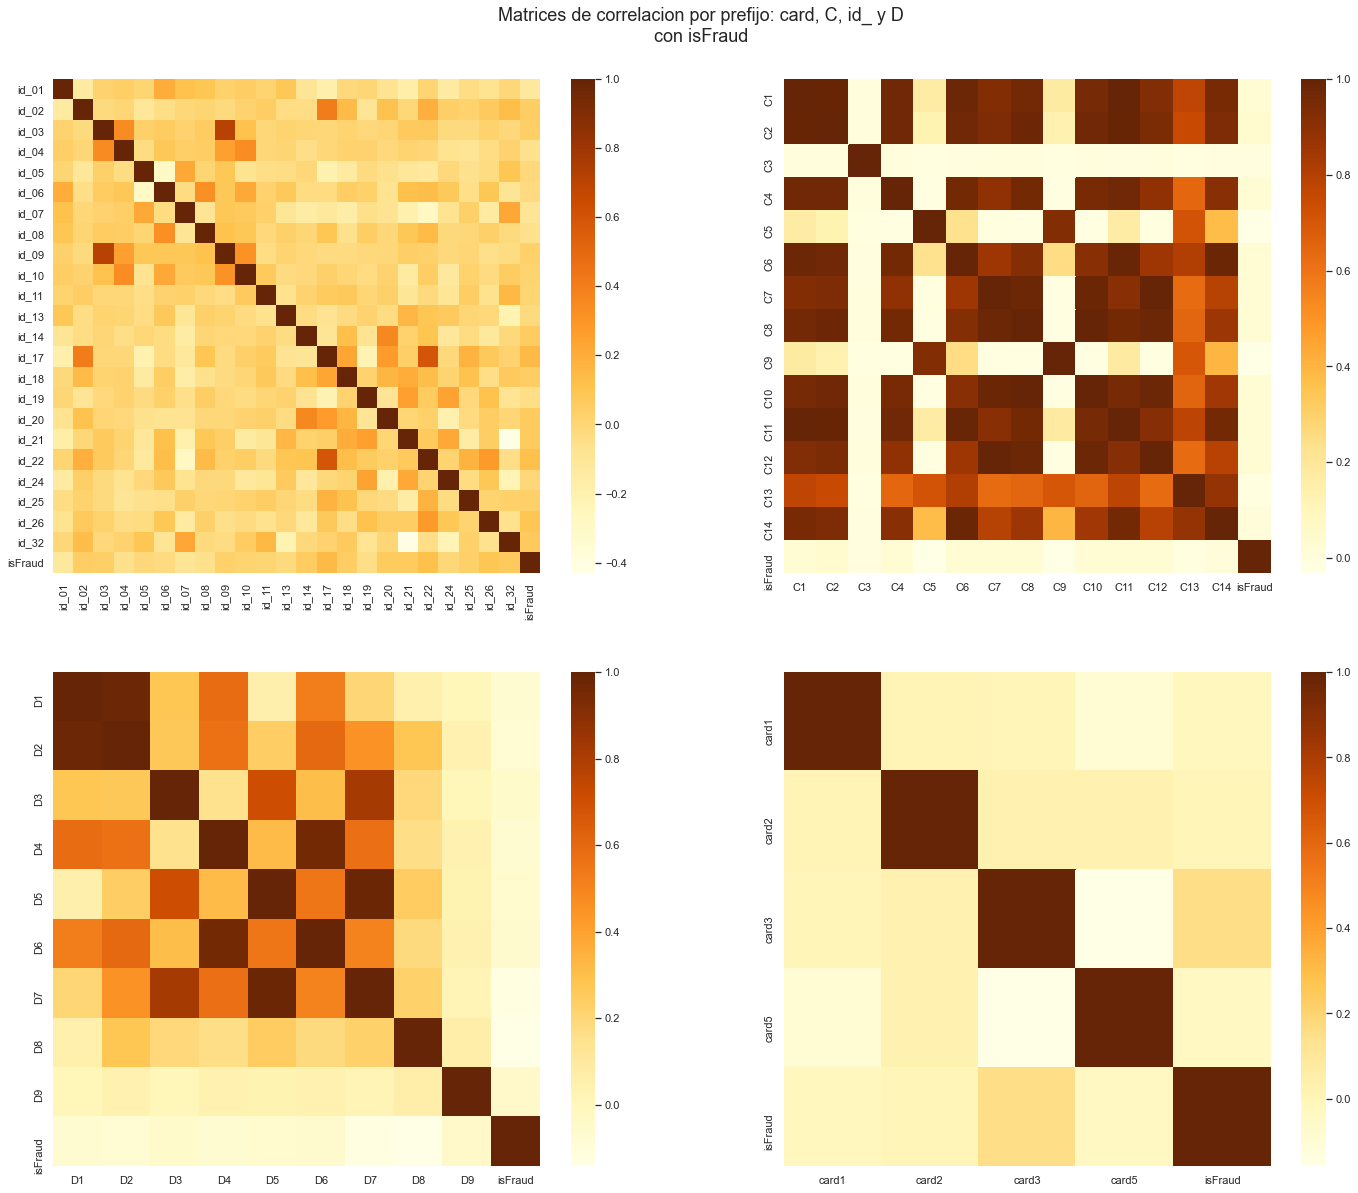

In [11]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(24,20))
colormap = sns.color_palette("YlOrBr", as_cmap=True)

sns.heatmap(df[card_columns + ["isFraud"]].corr(),
           ax=axs[1][1],
           cmap = colormap)

sns.heatmap(df[C_columns + ["isFraud"]].corr(),
           ax=axs[0][1],
           cmap = colormap)

sns.heatmap(df[id__columns + ["isFraud"]].corr(),
           ax=axs[0][0],
           cmap = colormap)

sns.heatmap(df[D_columns + ["isFraud"]].corr(),
            ax=axs[1][0],
           cmap = colormap)

fig.suptitle("Matrices de correlacion por prefijo: card, C, id_ y D\ncon isFraud", fontsize=18, y = 0.93)

plt.show()

### Visualización 3

In [12]:
lista_features_binarias = ["id_35", "id_36", "id_37", "id_38",
                               'M1', 'M2', 'M3', "M5", "M6", 'M7', 'M8', 'M9',
                               "id_12", "id_27", "id_28", "id_29","id_16",
                               'DeviceType']

In [13]:
def binary_encoding(value, keys):
    if(value==keys[0]):
        return 1
    elif(value==keys[1]):
        return 0
    return np.nan

In [14]:
df_binaria = pd.DataFrame()

# Features binarios
lista_features_binarias = [
    [["id_35", "id_36", "id_37", "id_38", 'M1', 'M2', 'M3', "M5", "M6", 'M7', 'M8', 'M9'], ["T","F"]],
    [["id_12", "id_27", "id_28", "id_29","id_16"], ["Found", "NotFound"]]
]
for features_binarias, keys in lista_features_binarias:
    for feature in features_binarias:
        df_binaria[feature] = df[feature].apply(lambda x: binary_encoding(x, keys))
        
df_binaria = df_binaria.fillna(-1)

In [15]:
df_binario_true = df_binaria[df["isFraud"]==True]

binario_true_vals0 = []
binario_true_vals1 = []
cols_true = list(df_binario_true.columns)
for col in df_binario_true.columns:
    count = df_binario_true[col].value_counts()
    binario_true_vals1.append(count[1.0])
    try:
        binario_true_vals0.append(count[0.0])
    except KeyError:
        binario_true_vals0.append(0)

In [16]:
df_binario_false = df_binaria[df["isFraud"]==False]

binario_false_vals0 = []
binario_false_vals1 = []
cols_true = list(df_binario_false.columns)
for col in df_binario_false.columns:
    count = df_binario_false[col].value_counts()
    binario_false_vals1.append(count[1.0])
    try:
        binario_false_vals0.append(count[0.0])
    except KeyError:
        binario_false_vals0.append(0)

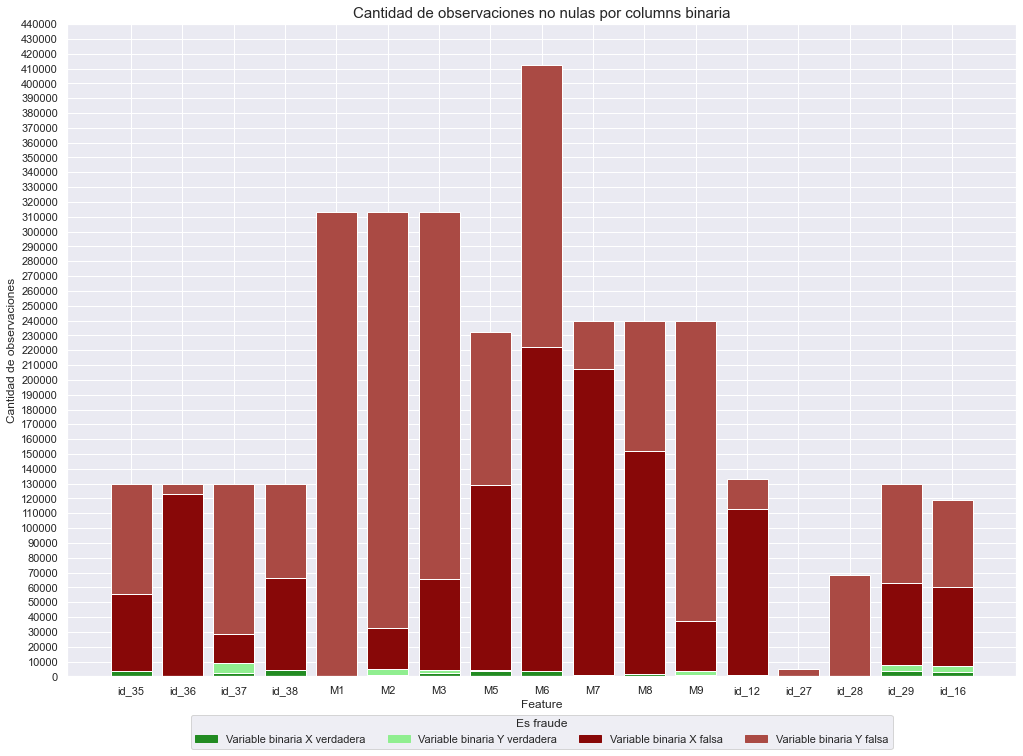

In [17]:
fig, axs = plt.subplots(figsize=(17,12))

# create data
x = cols_true
y1 = binario_true_vals0
y2 = binario_true_vals1
y3 = binario_false_vals0
y4 = binario_false_vals1

colors = ['#228B22', '#90EE90', '#880808', '#AA4A44']
# plot bars in stack manner
plt.bar(x, y1, color=colors[0])
plt.bar(x, y2, bottom=y1, color=colors[1])
plt.bar(x, y3, bottom=y2, color=colors[2])
plt.bar(x, y4, bottom=y3, color=colors[3])


patch1 = mpatches.Patch(color= colors[0], label='Variable binaria X verdadera')
patch2 = mpatches.Patch(color= colors[1], label='Variable binaria Y verdadera')
patch3 = mpatches.Patch(color= colors[2], label='Variable binaria X falsa')
patch4 = mpatches.Patch(color= colors[3], label='Variable binaria Y falsa')

axs.legend(loc='upper center',  ncol=4, bbox_to_anchor=(0.5, -0.05),
           title="Es fraude",
           handles=[patch1, patch2, patch3, patch4])

axs.set_title("Cantidad de observaciones no nulas por columns binaria", fontsize=15)

axs.set(
    ylabel="Cantidad de observaciones",
    xlabel="Feature",
    yticks = range(0,450000,10000)
)
plt.show()

### Visualización 4

In [18]:
V_cols_reales = set()

for col in V_columns:
    for val in df[col].value_counts().index:
        if (val % 1.0 != 0.0):
            V_cols_reales.add(col)       

In [19]:
corr_variables_continuas = df[list(V_cols_reales) + ["isFraud"]].corr()["isFraud"]

In [20]:
nlargest_continuas = corr_variables_continuas.nlargest(21).index

In [21]:
# Obtencion de datos

df_continuas =  pd.DataFrame()
for feature in nlargest_continuas:
    df_new = pd.DataFrame()
    df_new["points"] = df[feature].apply(lambda x: 10.0 if(x>10.0) else x)
    df_new["isFraud"] = df["isFraud"]
    df_new["feature"] = feature
    df_continuas = df_continuas.append(df_new)

df_continuas = df_continuas[df_continuas["feature"] != "isFraud"]

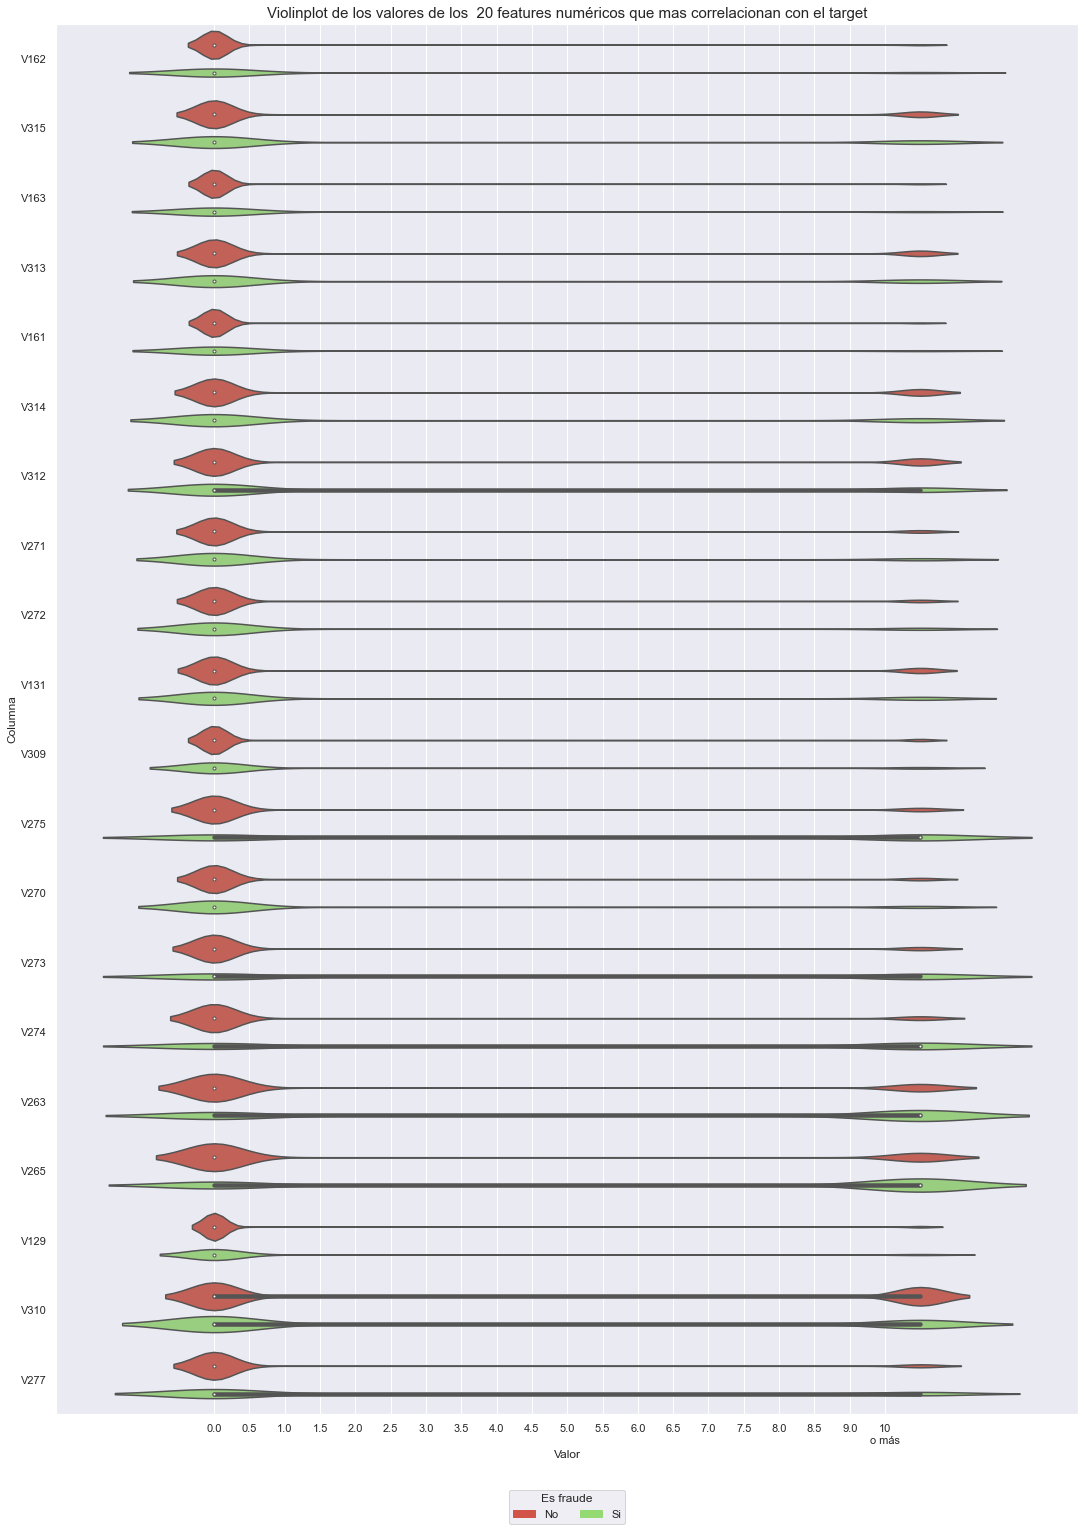

In [22]:
# Generacion de grafico 

sns.set(style="darkgrid")

fig, axs = plt.subplots(ncols=1, figsize=(15,20))
fig.tight_layout()

g1 = sns.violinplot(
    data=df_continuas,
    x="points",
    y="feature",
    hue="isFraud",
    palette=sns.color_palette(['#d25347', '#94da72'])
)

ids = list(np.arange(0,10,0.5))
ids_labels = list(np.arange(0,10,0.5))
ids_labels[-1] = "10\no más"
g1.set(
    ylabel="Columna",
    xlabel="Valor",
    xticks=ids,
    xticklabels=ids_labels,
)

import matplotlib.patches as mpatches
green_patch = mpatches.Patch(color='#d25347', label='NO')
red_patch = mpatches.Patch(color='#94da72', label='SI')
g1.legend(loc='upper center',  ncol=2, bbox_to_anchor=(0.5, -0.05), title="Es fraude", labels=['No', 'Si'], handles=[green_patch, red_patch])

g1.set_title("Violinplot de los valores de los  20 features numéricos que mas correlacionan con el target", fontsize=15)

plt.show()

### Visualización 5

In [23]:
DeviceInfo_ncols = df["DeviceInfo"].value_counts().nlargest(20).index
DeviceInfo_nlargest = df.groupby(["DeviceInfo","isFraud"])["isFraud"].count()
df_DeviceInfo = DeviceInfo_nlargest[DeviceInfo_ncols].reset_index(name='cantidad')
df_DeviceInfo.head()

,DeviceInfo,isFraud,cantidad
0,Windows,0,44601
1,Windows,1,3121
2,iOS Device,0,18542
3,iOS Device,1,1240
4,MacOS,0,12295


In [24]:
id_30_ncols = df["id_30"].value_counts().nlargest(20).index
id_30_nlargest = df.groupby(["id_30","isFraud"])["isFraud"].count()
df_id_30 = id_30_nlargest[id_30_ncols].reset_index(name='cantidad')
df_id_30.head()

,id_30,isFraud,cantidad
0,Windows 10,0,20498
1,Windows 10,1,657
2,Windows 7,0,12678
3,Windows 7,1,432
4,iOS 11.2.1,0,3539


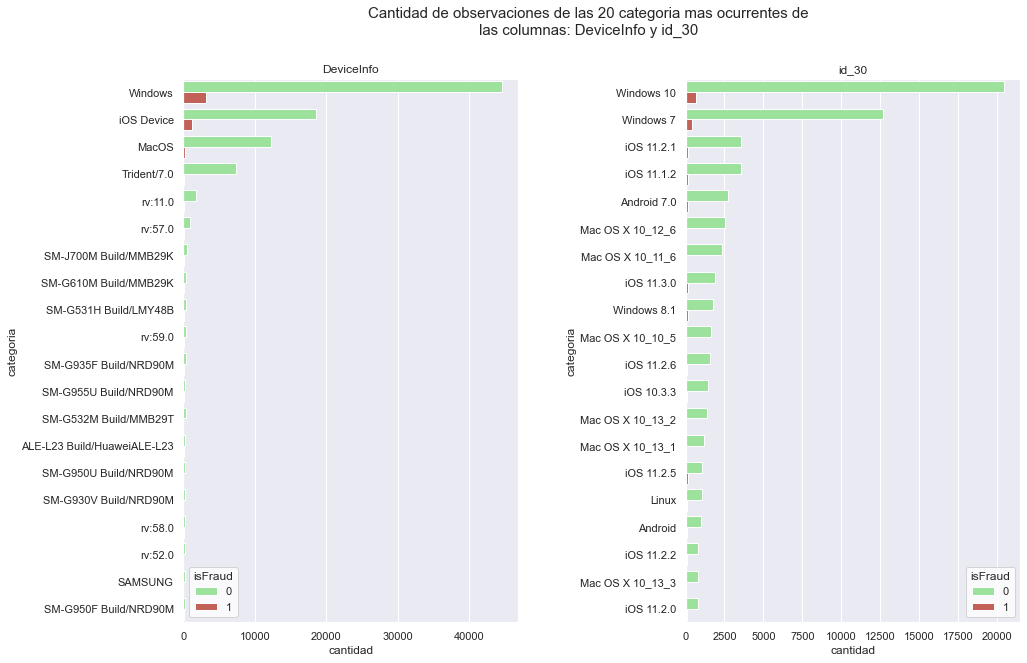

In [25]:
fig, axs = plt.subplots(ncols=2, figsize=(15,10))
sns.set_theme(style="whitegrid")
sns.barplot(x="cantidad", y="DeviceInfo", hue="isFraud", data=df_DeviceInfo,ax=axs[0],
           palette = ["#90EE90", "#d25347"])

sns.barplot(x="cantidad", y="id_30", hue="isFraud", data=df_id_30,ax=axs[1],
            palette = ["#90EE90", "#d25347"])


fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.5, hspace=None)
fig.suptitle("Cantidad de observaciones de las 20 categoria mas ocurrentes de\nlas columnas: DeviceInfo y id_30", fontsize=15)

axs[0].set_title("DeviceInfo")
axs[1].set_title("id_30")
axs[0].set_ylabel("categoria")
axs[1].set_ylabel("categoria")

plt.show()

### Visualización 6

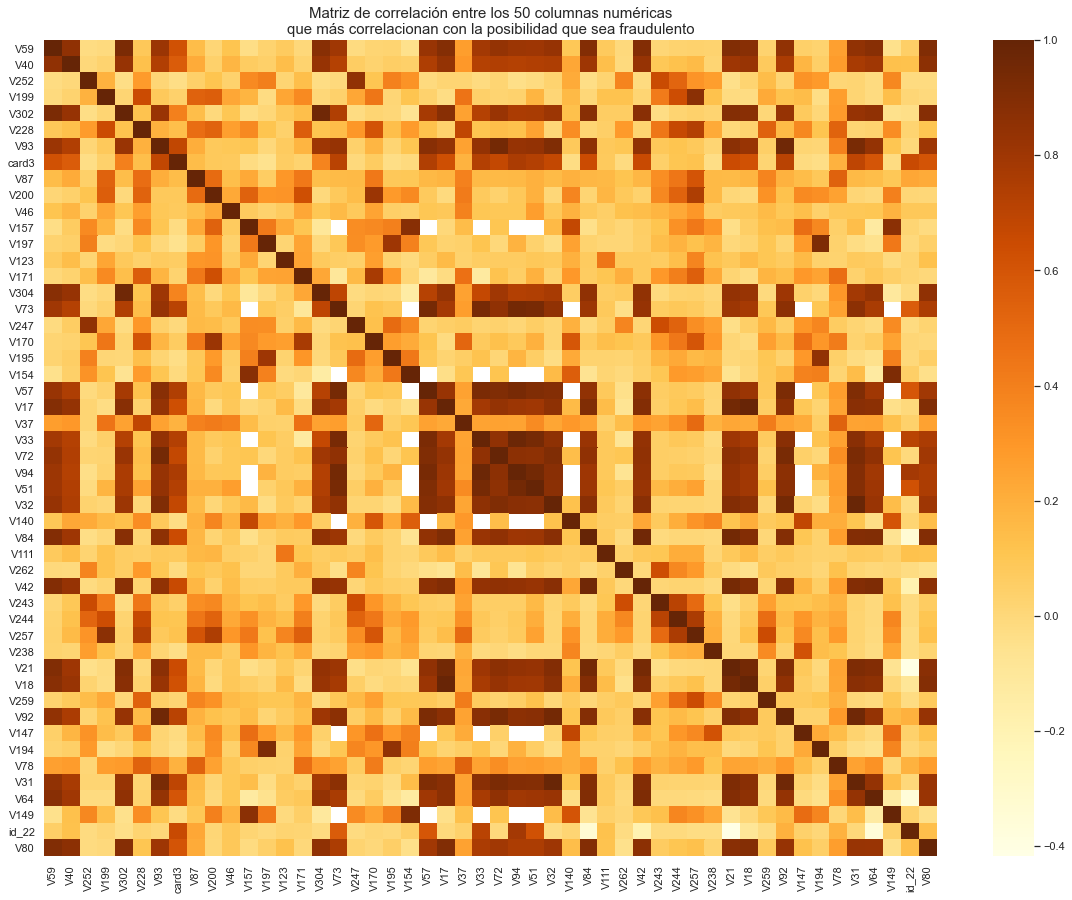

In [26]:
fig, axs = plt.subplots(ncols=1, figsize=(20,15))

axs.set_title("Matriz de correlación entre los 50 columnas numéricas\nque más correlacionan con la posibilidad que sea fraudulento", fontsize=15)

sns.heatmap(df[top_50].corr(),  cmap = colormap)

plt.show()